## Importing Libraries and Data

In [1]:
import re
import random
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Stemming / Lemmatizing and cleaning the text data

In [4]:
def porter_stemmer(word):
    """
    Apply the Porter stemming algorithm to a word.
    """
    # Define regular expressions for matching various patterns
    vowels = '[aeiou]'
    consonants = '[^aeiou]'
    m = f'^{consonants}?{vowels}[^aeiouwxy]$'
    m_eq_1 = f'^{consonants}?({vowels}[^aeiouwxy]|[aeiouy][^{vowels}])$'
    m_gt_1 = f'^{consonants}?({vowels}[^aeiouwxy]|[aeiouy][^{vowels}]).+$'

    def measure(word):
        return len(re.findall(f'{consonants}{vowels}', word))

    def ends_cvc(word):
        return re.search(m, word) is not None and re.search(m_eq_1, word) is None

    # Step 1a
    if word.endswith('sses'):
        word = word[:-2]
    elif word.endswith('ies'):
        word = word[:-2] + 'i'
    elif word.endswith('s'):
        word = word[:-1]

    # Step 1b
    if re.search('eed$', word):
        stem = re.sub('eed$', '', word)
        if len(stem) > 1:
            word = stem + 'ee'
    elif re.search('(ed|ing)$', word):
        stem = re.sub('(ed|ing)$', '', word)
        if re.search('[aeiouy]', stem):
            word = stem
            if re.search('at$', word):
                word = word + 'e'
            elif re.search('bl$', word):
                word = word + 'e'
            elif re.search('iz$', word):
                word = word + 'e'
            elif re.search('([^aeiouylsz])\1$', word):
                word = re.sub('([^aeiouylsz])\1$', '\\1', word)
            elif re.search('^([^aeiouy][aeiouy][^aeiouywxY])|(^[aeiouy][^aeiouywxY])$', word):
                word = word + 'e'

    # Step 1c
    if re.search('y$', word):
        stem = re.sub('y$', '', word)
        if re.search('[aeiouy]', stem):
            word = stem + 'i'

    # Step 2
    if re.search('(ational|tional|enci|anci|izer|bli|alli|entli|eli|ousli|ization|ation|ator|alism|iveness|fulness|ousness|aliti|iviti|biliti)$', word):
        stem = re.sub('(ational|tional|enci|anci|izer|bli|alli|entli|eli|ousli|ization|ation|ator|alism|iveness|fulness|ousness|aliti|iviti|biliti)$', '', word)
        if len(stem) > 1:
            word = stem

    # Step 3
    if re.search('(icate|ative|alize|iciti|ical|ful|ness)$', word):
        stem = re.sub('(icate|ative|alize|iciti|ical|ful|ness)$', '', word)
        if len(stem) > 1:
            word = stem

    # Step 4
    if re.search('al$', word):
        stem = re.sub('al$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ance$', word):
        stem = re.sub('ance$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ence$', word):
        stem = re.sub('ence$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('er$', word):
        stem = re.sub('er$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ic$', word):
        stem = re.sub('ic$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('able$', word):
        stem = re.sub('able$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ible$', word):
        stem = re.sub('ible$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ant$', word):
        stem = re.sub('ant$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ement$', word):
        stem = re.sub('ement$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ment$', word):
        stem = re.sub('ment$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ent$', word):
        stem = re.sub('ent$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('sion$', word):
        stem = re.sub('sion$', 's', word)
        if len(stem) > 1:
            word = stem
    elif re.search('tion$', word):
        stem = re.sub('tion$', 't', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ou$', word):
        stem = re.sub('ou$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ism$', word):
        stem = re.sub('ism$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ate$', word):
        stem = re.sub('ate$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('iti$', word):
        stem = re.sub('iti$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ous$', word):
        stem = re.sub('ous$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ive$', word):
        stem = re.sub('ive$', '', word)
        if len(stem) > 1:
            word = stem
    elif re.search('ize$', word):
        stem = re.sub('ize$', '', word)
        if len(stem) > 1:
            word = stem

    # Step 5: Remove a final 'e' (except for -le and -me)
    if re.search('e$', word):
        stem = re.sub('e$', '', word)
        if (measure(stem) > 1) or ((measure(stem) == 1) and (not ends_cvc(stem))):
            word = stem

    return word


In [5]:
porter_stemmer('How is the world like')

'How is the world lik'

In [6]:
# Remove website links
def remove_links(text):
    template = re.compile(r'https?://\S+|www\.\S+') 
    text = template.sub(r'', text)
    return text

# Remove HTML tags
def remove_html(text):
    template = re.compile(r'<[^>]*>') 
    text = template.sub(r'', text)
    return text

def text2words(text):
      return word_tokenize(text)
    
def to_lowercase(text):
    return text.lower()

# Remove stopwords
def remove_stopwords(words, stop_words):
    return [word for word in words if word not in stop_words]

# Remove none ascii characters
def remove_non_ascii(text):
    template = re.compile(r'[^\x00-\x7E]+') 
    text = template.sub(r'', text)
    return text

# Replace none printable characters
def remove_non_printable(text):
    template = re.compile(r'[\x00-\x0F]+') 
    text = template.sub(r' ', text)
    return text

# Remove special characters
def remove_special_chars(text):
        text = re.sub("'s", '', text)
        template = re.compile('["#$%&\'()\*\+-/:;<=>@\[\]\\\\^_`{|}~]') 
        text = template.sub(r' ', text)
        return text

# Replace multiple punctuation 
def replace_multiplt_punc(text):
        text = re.sub('[.!?]{2,}', '.', text)
        text = re.sub(',+', ',', text) 
        return text

def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Remove numbers
def remove_numbers(text):
        text = re.sub('\d+', ' ', text)
        return text

def handle_spaces(text):
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    
    # Remove spaces at the beginning and at the end of string
    text = text.strip()
    return text

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ([lemmatizer.lemmatize(word, pos='v') for word in words])

def clean_text(text, stemmer):
    text = remove_links(text)
    text = remove_html(text)
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_non_printable(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = text.lower()
    text = handle_spaces(text)
    
    stop_words = set(stopwords.words('english'))
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    words = word_tokenize(' '.join(words))
    
    # stem words using Porter stemmer or Snowball Stemmer algorithm
    stemmed_words = []
    if stemmer=='porter':
        for word in words:
            stemmed_words.append(porter_stemmer(word)) #Porter stemmer
            
    elif stemmer=='snowball':
        sb = SnowballStemmer(language='english')
        for word in words:
            stemmed_words.append(sb.stem(word)) #Snowball Stemmer
            
    elif stemmer=='lemmatize':
        words = lemmatize_words(words)
        stemmed_words = lemmatize_verbs(words) #Lemmatize text
    else:
        raise Exception("Error invalid stemmer. Try 'ps' or 'lm' ")
        
    return stemmed_words

In [7]:
# Remove unwanted characters and stopwords
cleaned_text = []
for text in df['comment_text']:
    filtered_text = clean_text(text,stemmer='lemmatize')
    cleaned_text.append(' '.join(filtered_text))

# Add cleaned text to dataframe
df['cleaned_text'] = cleaned_text

In [8]:
# Remove unwanted characters and stopwords
cleaned_text = []
for text in df['comment_text']:
    filtered_text = clean_text(text, stemmer = 'porter')
    cleaned_text.append(' '.join(filtered_text))

# Add cleaned text to dataframe
df['cleaned_text_ps'] = cleaned_text

In [9]:
# Remove unwanted characters and stopwords
cleaned_text = []
for text in df['comment_text']:
    filtered_text = clean_text(text, stemmer ='snowball')
    cleaned_text.append(' '.join(filtered_text))

# Add cleaned text to dataframe
df['cleaned_text_sb'] = cleaned_text

In [10]:
index = random.randint(0, len(df))

df['comment_text'].iloc[index]

"Ok then, but Joe the Plumber got a lot more, why isn't he mentioned? Why Ayers?"

In [11]:
df['cleaned_text'].iloc[index]

'ok joe plumber get lot mention ayers'

In [12]:
df['cleaned_text_sb'].iloc[index]

'ok joe plumber got lot mention ayer'

In [13]:
df['cleaned_text_ps'].iloc[index]

'ok jo plumb got lot mention ay'

In [14]:
# Create a new column for comment length
df['comment_length'] = df['comment_text'].apply(len)

In [15]:
#df.to_csv("cleaned_data.csv",index=False)

## Exploratory data analysis (EDA) on the Toxic Comment Data

### Basic statistics 
We'll compute some basic statistics about the data, such as the number of comments, the number of toxic comments, the average length of comments, and the distribution of toxic comments across categories.

In [16]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Number of comments
num_comments = len(df)

# Average length of comments
avg_length = df['comment_text'].apply(len).mean()

# Print the statistics
print('Number of comments:', num_comments)
print('Average length of comments:', avg_length)

# Distribution of toxic comments across categories
def distribution_info(categories):
    for category in categories:
        distribution = {}
        num_category_self = len(df[df[category]== 1])
        for cat in categories:
            if cat != category:
                num_cur_category = len(df[df[cat] == 1])
                distribution[cat] = num_cur_category / num_category_self if num_category_self > 0 else 0

        print(f'\nDistribution of {category} comments across categories:')        
        for category, proportion in distribution.items():
            print(category + ':', proportion)
        
distribution_info(categories)

Number of comments: 159571
Average length of comments: 394.0732213246768

Distribution of toxic comments across categories:
severe_toxic: 0.10428926376356741
obscene: 0.5524388649143455
threat: 0.03125408656989669
insult: 0.5150385772198248
identity_hate: 0.09186609127762521

Distribution of severe_toxic comments across categories:
toxic: 9.58871473354232
obscene: 5.29717868338558
threat: 0.29968652037617555
insult: 4.938557993730408
identity_hate: 0.8808777429467085

Distribution of obscene comments across categories:
toxic: 1.8101550479346669
severe_toxic: 0.18877973724701147
threat: 0.05657474257308557
insult: 0.9322996804355546
identity_hate: 0.16629186886022015

Distribution of threat comments across categories:
toxic: 31.99581589958159
severe_toxic: 3.3368200836820083
obscene: 17.675732217573223
insult: 16.47907949790795
identity_hate: 2.9393305439330546

Distribution of insult comments across categories:
toxic: 1.941602132791672
severe_toxic: 0.20248825695061573
obscene: 1.07261

### Class distribution

Well Check the distribution of the target variable (toxicity) to ensure that there is a balance between the number of samples in all toxicity categories.

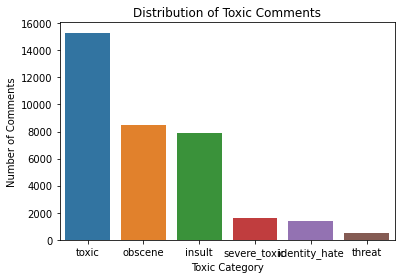

In [17]:
# Compute the distribution of the target variable
toxicity_dist = df.iloc[:, 2:8].sum().sort_values(ascending=False)
 
# Plot the distribution of the target variable
sns.barplot(x=toxicity_dist.index, y=toxicity_dist.values)
plt.title('Distribution of Toxic Comments')
plt.xlabel('Toxic Category')
plt.ylabel('Number of Comments')
plt.show()

### Correlation analysis: 
We'll check the correlation between different features/variables in the data to identify any patterns or relationships.

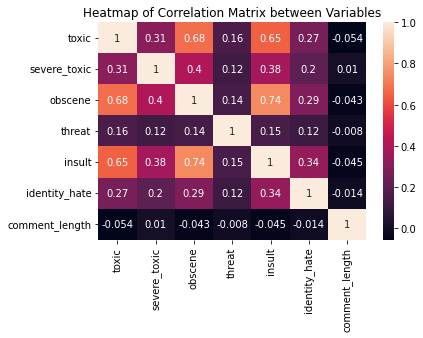

In [18]:
# Create a heatmap of correlation matrix between variables
sns.heatmap(df[categories+['comment_length']].corr(), annot=True)
plt.title("Heatmap of Correlation Matrix between Variables")
plt.show()

### Word frequency: 
We'll check the frequency of the most common words in the corpus to get a sense of the vocabulary and what types of words are most commonly used. 

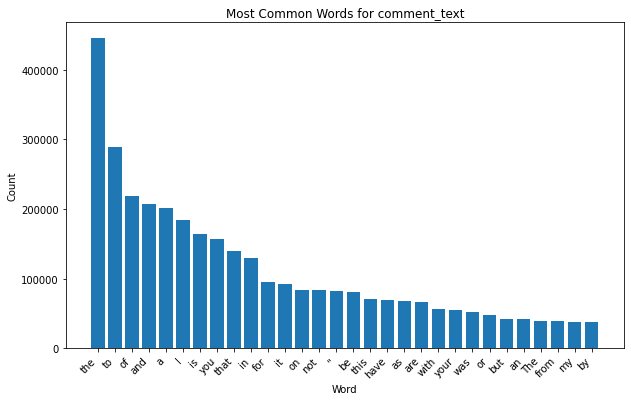

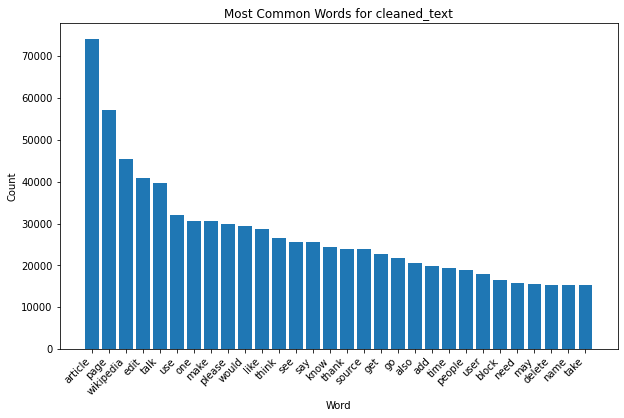

In [19]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Check the frequency of the most common words
def most_common_words_dist_vis(comment_column):
    corpus = df[comment_column].tolist()
    word_counts = Counter(' '.join(corpus).split())
    word_count_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
    word_count_df = word_count_df.sort_values(by='count', ascending=False)
    
    # Create a histogram of the word counts
    plt.figure(figsize=(10, 6))
    plt.bar(word_count_df['word'][:30], word_count_df['count'][:30])
    plt.title(f'Most Common Words for {comment_column}')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

comment_columns = ['comment_text', 'cleaned_text']
for column in comment_columns:
    most_common_words_dist_vis(column)

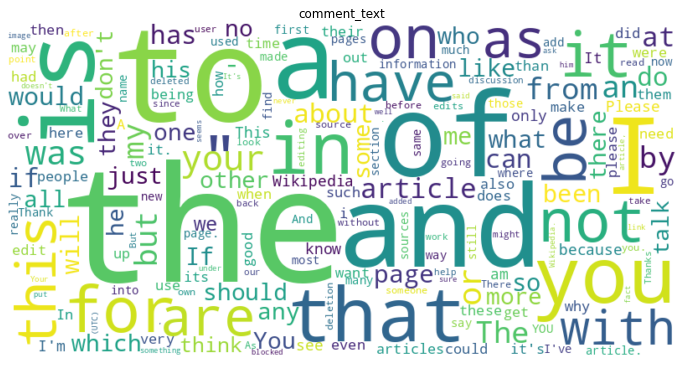

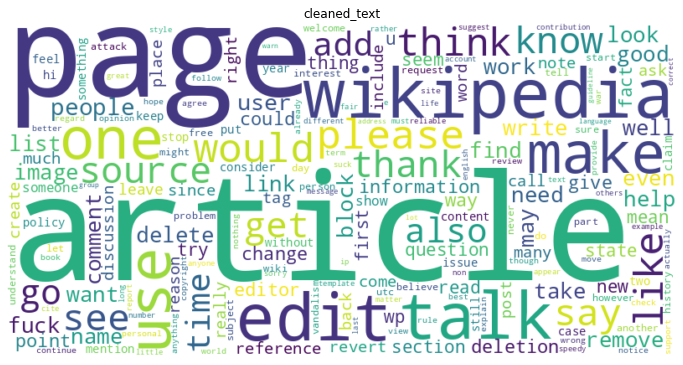

In [20]:
#most common words word cloud
def most_common_words_word_cloud_vis(comment_column):
    # Check the frequency of the most common words
    corpus = df[comment_column].tolist()
    word_counts = Counter(' '.join(corpus).split())

    # Create a word cloud to visualize the most common words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(comment_column)
    plt.show()
    
for column in comment_columns:
    most_common_words_word_cloud_vis(column)

### Relationship between target and most frequent words: 
We'll check if there are any words that appear more frequently in one category than the other.

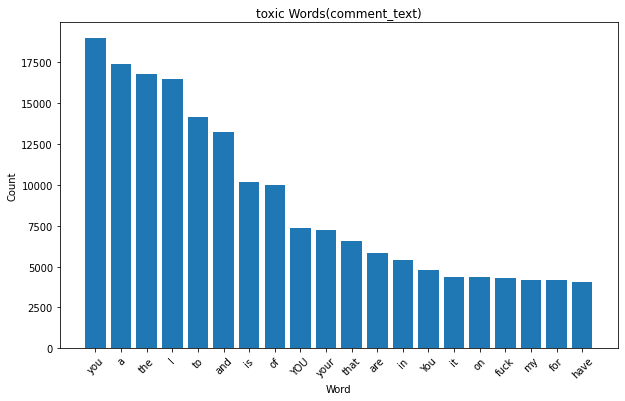

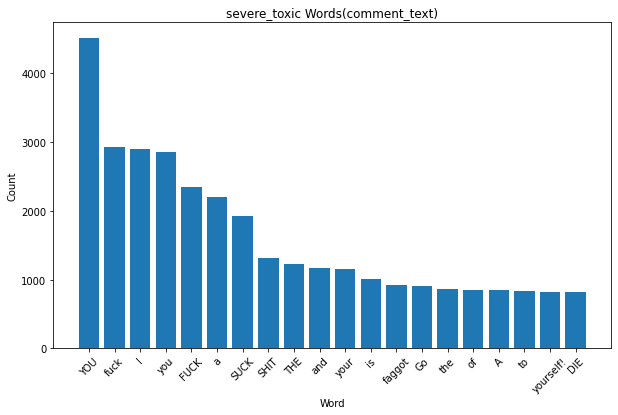

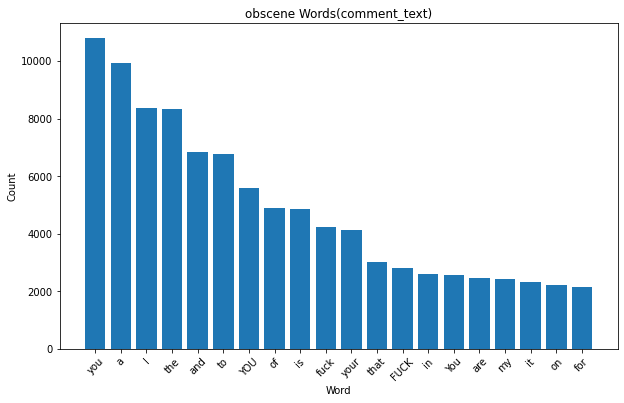

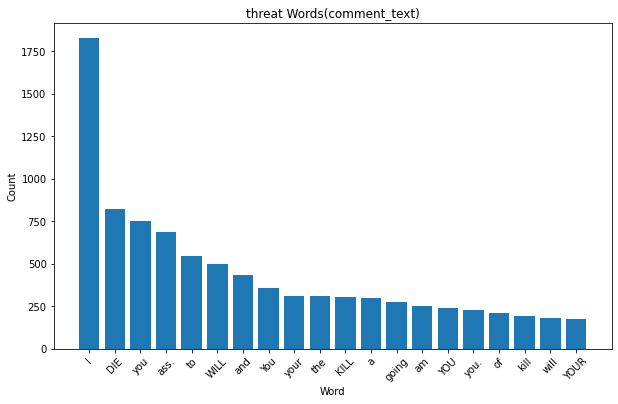

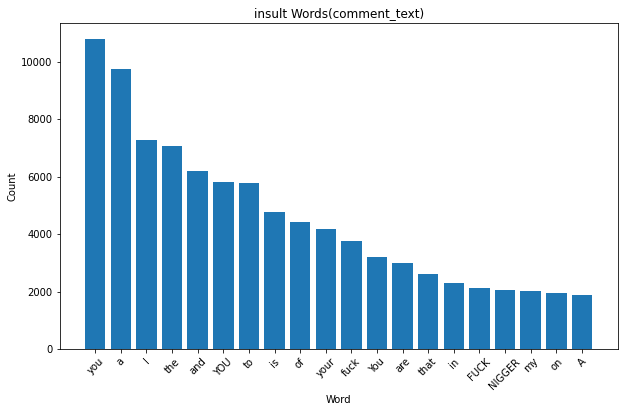

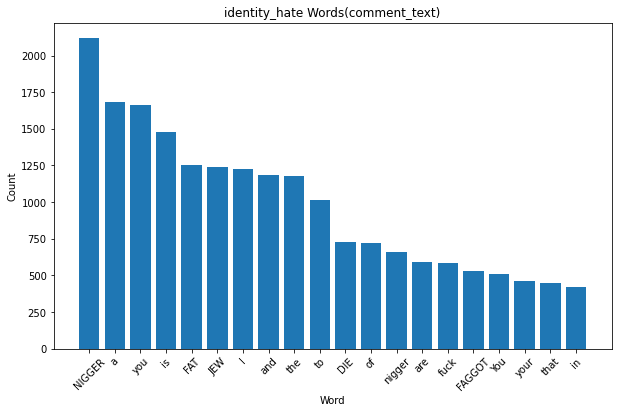

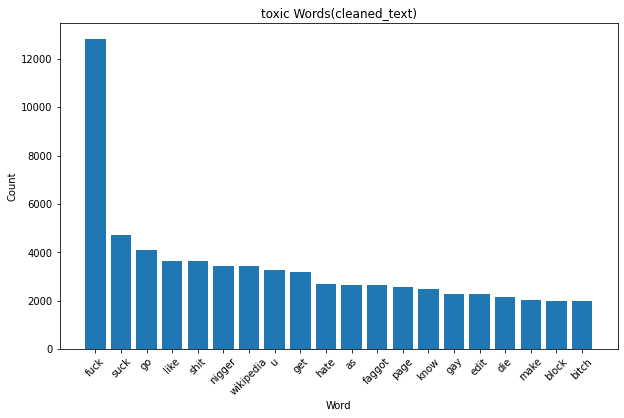

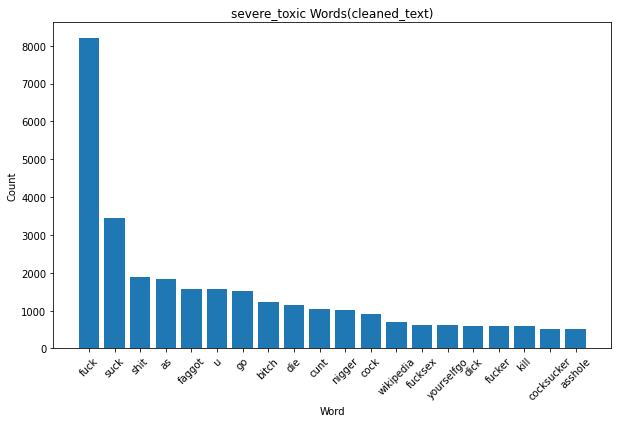

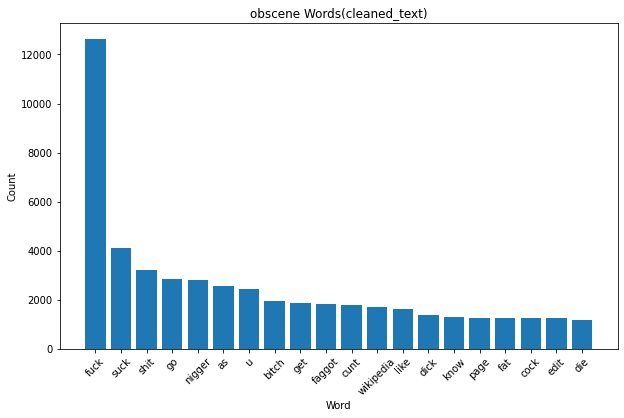

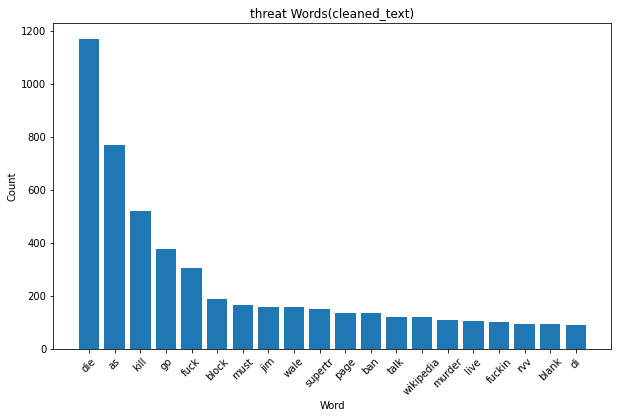

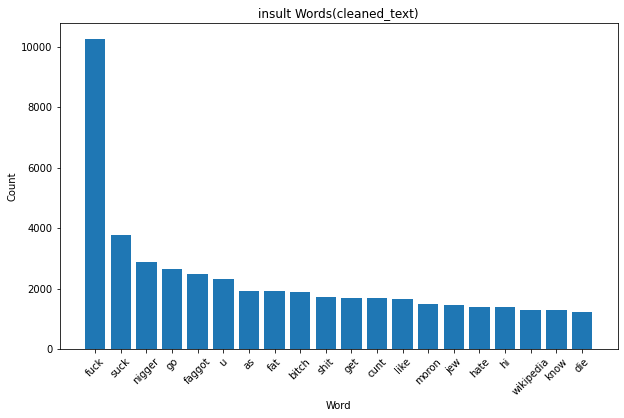

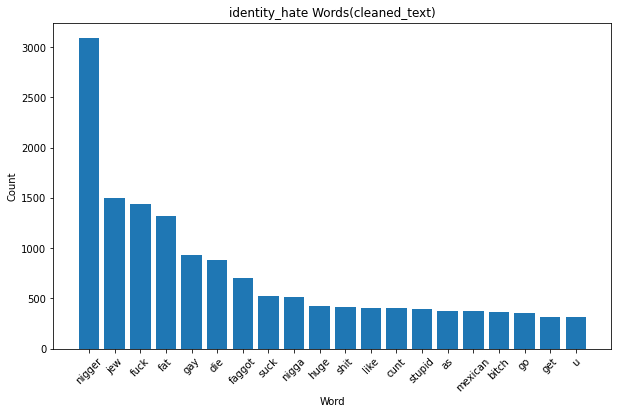

In [21]:
#Check for words that appear more frequently in toxic comments
def most_frequent_words_cat_distribution_vis(toxic_categories, comment_column):
    for toxic_category in toxic_categories:
        # Check for words that appear more frequently 
        frequent_words = Counter(" ".join(df[df[toxic_category] == 1][comment_column]).split()).most_common(20)
        # Create bar charts for each category
        plt.figure(figsize=(10, 6))
        plt.bar([word[0] for word in frequent_words], [word[1] for word in frequent_words])
        plt.xticks(rotation=45)
        plt.title(f'{toxic_category} Words({comment_column})')
        plt.xlabel('Word')
        plt.ylabel('Count')
        plt.show()
        
for column in comment_columns:
    most_frequent_words_cat_distribution_vis(categories, column)   

### Word associations
We'll check if there are any words that are strongly associated with toxic comments. 

We can use techniques such as association rule mining or co-occurrence analysis to identify these associations.

we'll use the Apriori algorithm, which uses a hash tree structure to store the support count of itemsets. Hence minimize memory requirements. 

Association rule mining is very memory hungry hence I cannot use it. Here is how you can perform it.

```python
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

def find_toxic_word_pairs(df, min_support=0.01, min_confidence=0.5, min_lift=1.5):
    """
    1. Load the dataset of toxic comments.
    2. Tokenize and preprocess the text data.
    3. Perform association rule mining on the preprocessed text data to find frequently occurring word pairs.
    4. Calculate the support, confidence, and lift of the word pairs.
    5. Filter the word pairs by confidence and lift threshold to get the strongly associated word pairs.
    6. Return the strongly associated word pairs.
    """
    # Tokenize and preprocess the text data
    df['tokens'] = df['cleaned_text'].apply(lambda x: x.split())
    
    # Perform association rule mining on the preprocessed text data
    te = TransactionEncoder()
    te_ary = te.fit(df['tokens']).transform(df['tokens'])
    df_apriori = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df_apriori, min_support=min_support, use_colnames=True)
    
    # Calculate the support, confidence, and lift of the word pairs
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
    rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
    rules = rules[(rules['antecedent_len'] == 1) & (rules['confidence'] > min_confidence)]
    
    # Filter the word pairs by confidence and lift threshold to get the strongly associated word pairs
    rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    rules = rules[rules['lift'] > min_lift]
    rules = rules.sort_values(by=['confidence', 'lift'], ascending=False)
    
    # Return the strongly associated word pairs
    return rules

```
Try using the o-occurrence analysis to identify these associations

In [22]:
from collections import defaultdict
from itertools import chain, combinations
from typing import List, Tuple

def apriori(transactions: List[List[str]], min_support: float = 0.1, min_confidence: float = 0.5) -> List[Tuple[Tuple[str], float]]:
    """
    Computes frequent itemsets and association rules using the Apriori algorithm.

    Parameters:
    - transactions: a list of lists, where each inner list represents a transaction of items
    - min_support: the minimum support threshold for frequent itemsets
    - min_confidence: the minimum confidence threshold for association rules

    Returns:
    - a list of tuples, where each tuple contains an itemset and its support
    """
    # Step 1: Compute the frequent itemsets using the Apriori algorithm
    itemsets = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            itemsets[frozenset([item])] += 1

    freq_itemsets = []
    while itemsets:
        freq_itemsets.extend(itemsets.items())
        new_itemsets = defaultdict(int)
        for itemset1, support1 in itemsets.items():
            for itemset2, support2 in itemsets.items():
                if len(itemset1.union(itemset2)) == len(itemset1) + 1:
                    new_itemsets[itemset1.union(itemset2)] += 1
        itemsets = {itemset: support for itemset, support in new_itemsets.items() if support / len(transactions) >= min_support}

    # Step 2: Compute the association rules
    rules = []
    for itemset, support in freq_itemsets:
        for item in itemset:
            antecedent = frozenset([item])
            consequent = itemset - antecedent
            if consequent and support / itemsets[antecedent] >= min_confidence:
                rules.append((tuple(antecedent), tuple(consequent), support / len(transactions)))

    return rules


**Note:** that we can also specify the min_support and min_confidence parameters to control the strictness of the association rules. The default values are 0.1 and 0.5, respectively.

In [23]:
#Still uses to more memory than i currently have.
"""# Tokenize the toxic comments
toxic_comments = df[df['toxic']==1]['cleaned_text']
tokenized_comments = [comment.split() for comment in toxic_comments]

# Mine for association rules
rules = apriori(tokenized_comments)"""

"# Tokenize the toxic comments\ntoxic_comments = df[df['toxic']==1]['cleaned_text']\ntokenized_comments = [comment.split() for comment in toxic_comments]\n\n# Mine for association rules\nrules = apriori(tokenized_comments)"

### Length distribution:
We'll check the distribution of comment lengths to see if there are any patterns or differences between the toxicity categories.

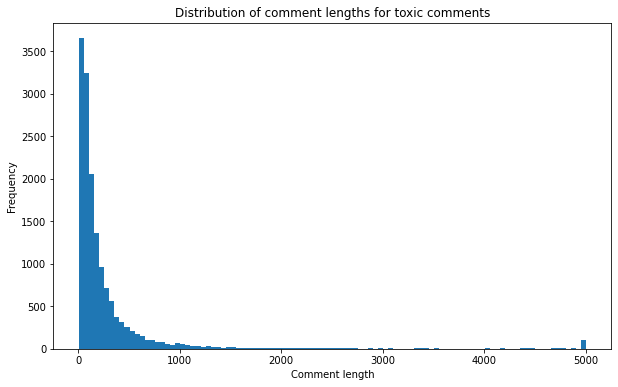

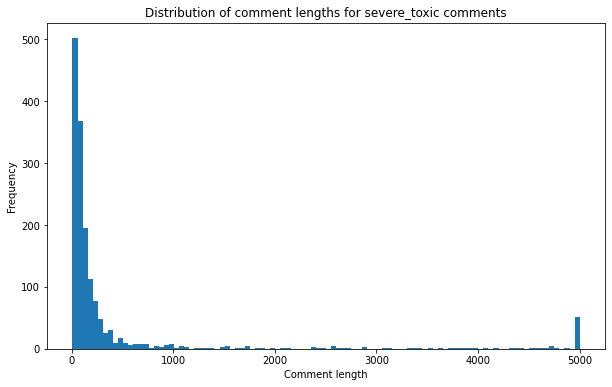

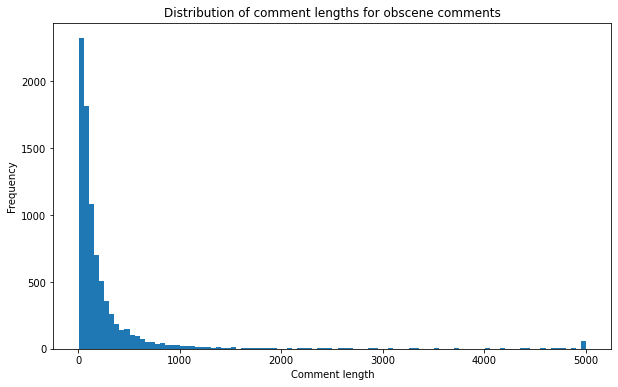

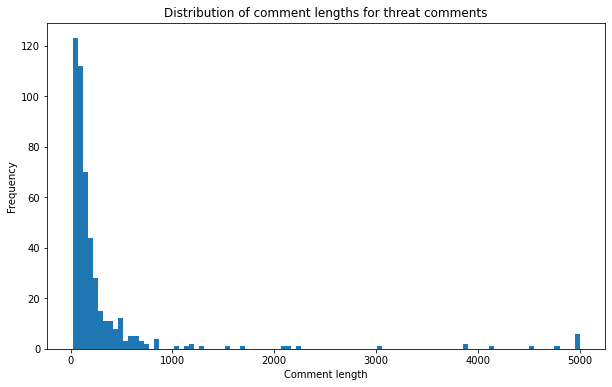

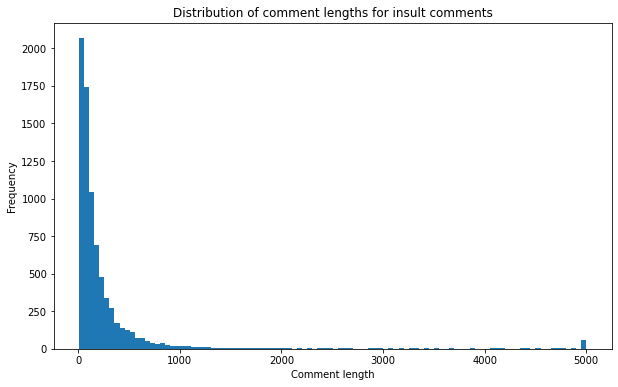

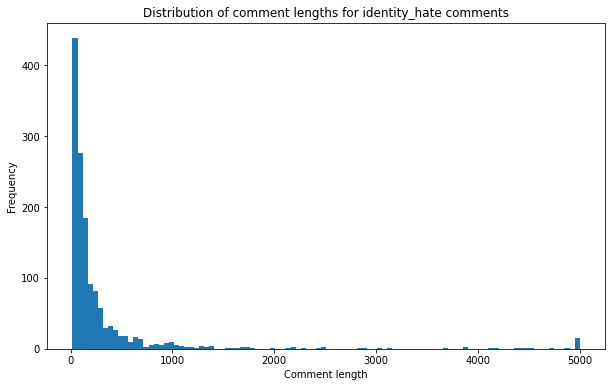

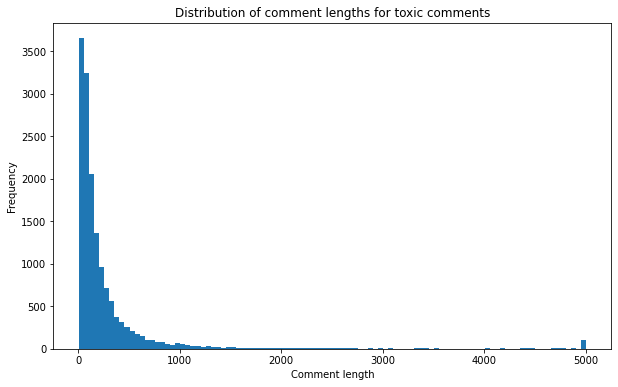

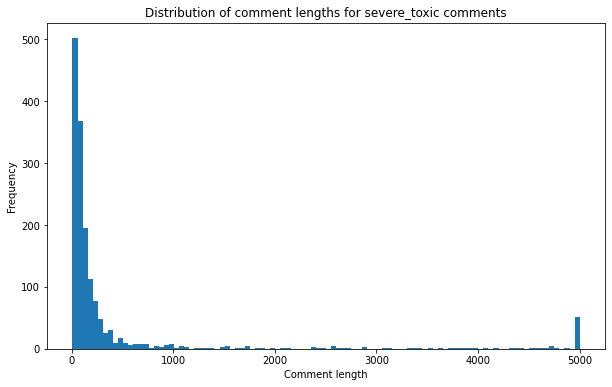

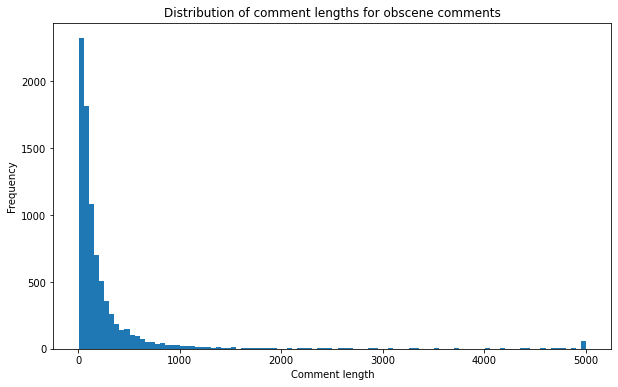

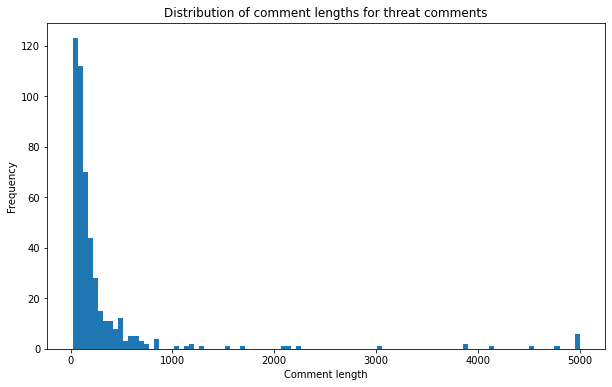

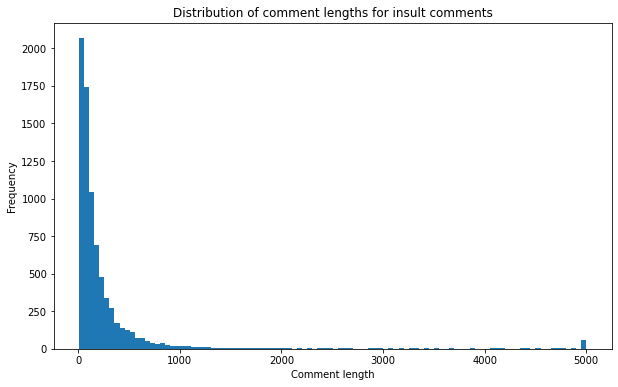

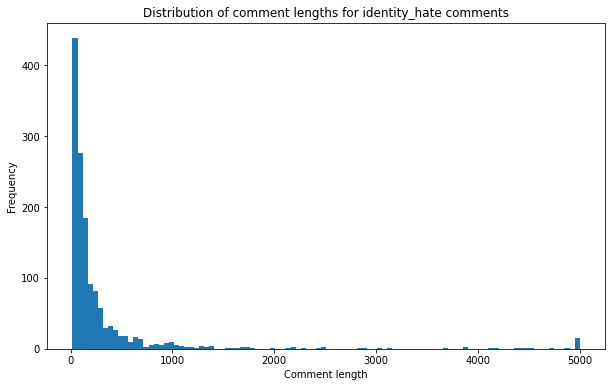

In [24]:
# Create histograms of comment length distribution for each toxic category
def comment_len_distribution_vis(toxic_categories, comment_column):
    for category in toxic_categories:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.hist(df[df[category] == 1]['comment_length'], bins=100)
        ax.set_title(f'Distribution of comment lengths for {category} comments')
        ax.set_xlabel('Comment length')
        ax.set_ylabel('Frequency')
        plt.show()
        
for column in comment_columns:
    comment_len_distribution_vis(categories, column)

##  DistilledBert Model

In [25]:
import torch
import torch.nn as nn
from transformers import DistilBertTokenizer, DistilBertModel

DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
class DistilBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistilBERTClass, self).__init__()
        
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(768, 768),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(768, 6)
        )

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        out = hidden_state[:, 0]
        out = self.classifier(out)
        return out

def predict_text(text, model, tokenizer, device=DEVICE):
    encoded_text = tokenizer.encode_plus(
        text,
        None,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        return_token_type_ids=True,
        truncation=True
    )
    # Tokenize the text and convert to input IDs
    input_ids = torch.tensor(encoded_text['input_ids'], dtype=torch.long).unsqueeze(0).to(device)
    attention_mask = torch.tensor(encoded_text['attention_mask'], dtype=torch.long).unsqueeze(0).to(device)
    token_type_ids = torch.tensor(encoded_text['token_type_ids'], dtype=torch.long).unsqueeze(0).to(device)

    # Generate the attention mask
    attention_mask = (input_ids != 0).float()

    # Make the prediction
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

    # Convert the logits to probabilities
    probs = torch.sigmoid(outputs)

    # Convert the probabilities to binary predictions
    preds = probs.detach().cpu().numpy()

    # Convert the binary predictions to class labels
    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    results = {label: round(pred.item(), 4) for label, pred in zip(labels, preds[0])}
    return results

2023-03-04 22:34:21.956814: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-04 22:34:21.956839: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Making predictions

In [26]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [27]:
# Load the trained model
model = DistilBERTClass()
model.load_state_dict(torch.load("toxic_comment_1.pkl", map_location=torch.device('cpu')))
model.to(DEVICE)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
text = random.sample(test_df['comment_text'].tolist(),1)
cleaned_text = clean_text(''.join(text),stemmer='lemmatize')
cleaned_text_ps = clean_text(''.join(text),stemmer='porter')
cleaned_text_sb = clean_text(''.join(text),stemmer='snowball')

' '.join(cleaned_text)

'disambig page banner hi drop ny mo another state wikiproject banner u add talk washington bridge disambiguation believe state actively tag disambiguation page except perhaps dab page distinguish primarily among many similarly name place within state need add state banner correspond every item every disambiguation page even add ct one wikiproject nrhp banner different reflect ownership development maintenance mostly nrhp dab page others build provide disambiguation resolve name conflict nrhp list place article yet article mostly base nris database cover approx place maybe non unique name like smith house u post office major project create disambiguation worth maintain wikiproject nrhp imagine comparable role wikiproject new york inactive wikiproject missouri active others play dab page hope background help'

In [29]:
predict_text(cleaned_text ,model, tokenizer, DEVICE)

{'toxic': 0.0042,
 'severe_toxic': 0.0006,
 'obscene': 0.0012,
 'threat': 0.001,
 'insult': 0.0015,
 'identity_hate': 0.0009}

In [30]:
predict_text(cleaned_text_ps ,model, tokenizer, DEVICE)

{'toxic': 0.0104,
 'severe_toxic': 0.0009,
 'obscene': 0.0024,
 'threat': 0.0015,
 'insult': 0.0034,
 'identity_hate': 0.0016}

In [31]:
predict_text(cleaned_text_sb ,model, tokenizer, DEVICE)

{'toxic': 0.0064,
 'severe_toxic': 0.0007,
 'obscene': 0.0015,
 'threat': 0.0011,
 'insult': 0.0021,
 'identity_hate': 0.001}